<a href="https://colab.research.google.com/github/Yeehui13/News-Sentiment/blob/main/News_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
upload = files.upload()

Saving news_headline.csv to news_headline.csv


In [4]:
data = pd.read_csv("news_headline.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    9999 non-null   object
 1   news    9999 non-null   object
dtypes: object(2)
memory usage: 156.4+ KB


In [6]:
data.head()

,date,news
0,1/7/2016,A 117-year-old woman in Mexico City finally re...
1,1/7/2016,IMF chief backs Athens as permanent Olympic host
2,1/7/2016,"The president of France says if Brexit won, so..."
3,1/7/2016,British Man Who Must Give Police 24 Hours Noti...
4,1/7/2016,100+ Nobel laureates urge Greenpeace to stop o...


In [7]:
data.tail()

,date,news
9994,28/05/2015,Nigerian Army dismisses 200 soldiers for cowar...
9995,28/05/2015,Mafia boss Pasquale Scotti arrested in Brazil ...
9996,28/05/2015,Russia would be able to occupy Baltics in two ...
9997,28/05/2015,New species of ancient human found
9998,28/05/2015,Kurds liberate Christian villages from Islamic...


In [8]:
data.dropna()

,date,news
0,1/7/2016,A 117-year-old woman in Mexico City finally re...
1,1/7/2016,IMF chief backs Athens as permanent Olympic host
2,1/7/2016,"The president of France says if Brexit won, so..."
3,1/7/2016,British Man Who Must Give Police 24 Hours Noti...
4,1/7/2016,100+ Nobel laureates urge Greenpeace to stop o...
...,...,...
9994,28/05/2015,Nigerian Army dismisses 200 soldiers for cowar...
9995,28/05/2015,Mafia boss Pasquale Scotti arrested in Brazil ...
9996,28/05/2015,Russia would be able to occupy Baltics in two ...
9997,28/05/2015,New species of ancient human found


#Sentimemt Analysis

In [11]:
#download the required resources from nltk
nltk.download('vader_lexicon')

#initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

##apply the sentiment analyzer to each headline and calculate the sentiment
sentiments = []
for headline in data['news']:
    if pd.isnull(headline): #check for null values
        polarity = 0.0  #assign a neutral polarity for null values
    else:
        headline_str = str(headline)  #convert headline to a string
        polarity = sia.polarity_scores(headline_str)['compound']
    sentiments.append(polarity)

#add the sentiment polarity values to the Dataframe
data['polarity'] = sentiments

#display the Dataframe with sentiment polarity values
print(data)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


            date                                               news  polarity
0       1/7/2016  A 117-year-old woman in Mexico City finally re...   -0.5574
1       1/7/2016   IMF chief backs Athens as permanent Olympic host   -0.0516
2       1/7/2016  The president of France says if Brexit won, so...    0.5719
3       1/7/2016  British Man Who Must Give Police 24 Hours Noti...   -0.8658
4       1/7/2016  100+ Nobel laureates urge Greenpeace to stop o...   -0.2960
...          ...                                                ...       ...
9994  28/05/2015  Nigerian Army dismisses 200 soldiers for cowar...    0.0000
9995  28/05/2015  Mafia boss Pasquale Scotti arrested in Brazil ...   -0.8689
9996  28/05/2015  Russia would be able to occupy Baltics in two ...    0.0000
9997  28/05/2015                 New species of ancient human found    0.0000
9998  28/05/2015  Kurds liberate Christian villages from Islamic...    0.0000

[9999 rows x 3 columns]


In [12]:
data.dropna(subset=['news'], inplace=True)

In [13]:
data.head()

,date,news,polarity
0,1/7/2016,A 117-year-old woman in Mexico City finally re...,-0.5574
1,1/7/2016,IMF chief backs Athens as permanent Olympic host,-0.0516
2,1/7/2016,"The president of France says if Brexit won, so...",0.5719
3,1/7/2016,British Man Who Must Give Police 24 Hours Noti...,-0.8658
4,1/7/2016,100+ Nobel laureates urge Greenpeace to stop o...,-0.2960


In [14]:
data.describe()

,polarity
count,9999.000000
mean,-0.199412
std,0.434612
min,-0.985400
25%,-0.561550
50%,-0.153100
75%,0.000000
max,0.954500


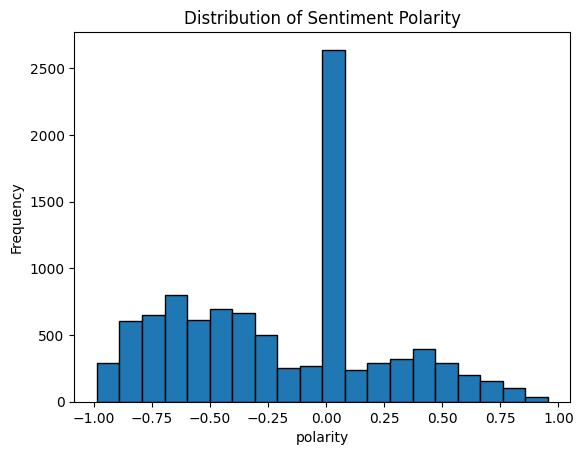

In [15]:
plt.hist(data['polarity'], bins=20, edgecolor='black')
plt.xlabel('polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity')
plt.show()

In [16]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [17]:
#download the required resources from nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
#combine all the headline into a single string
all_headlines = ' '.join(data['news'])

#create a set of stopwords
stopwords = set(stopwords.words('english'))

In [20]:
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(all_headlines)

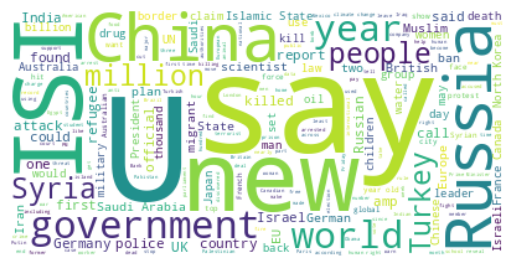

In [22]:
#plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
print(all_headlines)

A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later. Trinidad Alvarez Lira had waited years for proof that she had been born in 1898. IMF chief backs Athens as permanent Olympic host The president of France says if Brexit won, so can Donald Trump British Man Who Must Give Police 24 Hours Notice of Sex Threatens Hunger Strike: The man is the subject of a sexual risk order despite having never been convicted of a crime. 100+ Nobel laureates urge Greenpeace to stop opposing GMOs Brazil: Huge spike in number of police killings in Rio ahead of Olympics Austrias highest court annuls presidential election narrowly lost by right-wing candidate. Facebook wins privacy case, can track any Belgian it wants: Doesnt matter if Internet users are logged into Facebook or not Switzerland denies Muslim girls citizenship after they refuse to swim with boys at school: The 12- and 14-year-old will no longer be considered for naturalised citizenship because 